In [1]:
%matplotlib widget

In [2]:
from pathlib import Path

import numpy as np
import scipy as sp
import matplotlib.pylab as plt

In [3]:
val = np.fromfile('../output/spherical_v3/_val', dtype=np.float32)
col_index = np.fromfile('../output/spherical_v3/_col_index', dtype=np.int32)
row_index = np.fromfile('../output/spherical_v3/_row_index', dtype=np.int32)

In [4]:
len(val), len(col_index), len(row_index)

(23623535, 23623535, 515065)

In [5]:
min(col_index), max(col_index)

(0, 35999)

In [6]:
row_index[0], row_index[-1]

(0, 23623535)

In [7]:
20 * 30 * 60

36000

In [8]:
X_build_A_matrix_v3 = sp.sparse.csr_array((val, col_index, row_index))

In [9]:
X_build_A_matrix_v3.shape

(515064, 36000)

In [10]:
def load_gold(start, stop, suffix='20080201_20080214', path=Path('../tests/gold_prelim')):
    info_fname = path / f'info_{suffix}'
    info = np.fromfile(info_fname, dtype=np.int32)
    block = info[start-1], info[stop]

    w_fname = path / f'w{suffix}'
    j_fname = path / f'j{suffix}'
    m_fname = path / f'm{suffix}'
    
    w_all_vec = np.fromfile(w_fname, dtype=np.float32)
    j_all_vec = np.fromfile(j_fname, dtype=np.int32)
    m_all_vec = np.fromfile(m_fname, dtype=np.int32)

    I = slice(block[0], block[1])

    m_vec = m_all_vec[I]
    w_vec = w_all_vec[:m_vec[-1]]
    j_vec = j_all_vec[:m_vec[-1]]

    A = sp.sparse.csr_matrix((w_vec, j_vec, m_vec))
    return A

In [11]:
A_gold = load_gold(1, 1)

In [12]:
min(val), max(val)

(8.0037566e-14, 0.00011567628)

In [13]:
min(A_gold.data), max(A_gold.data)

(6.2824197e-14, 3.7331713e-06)

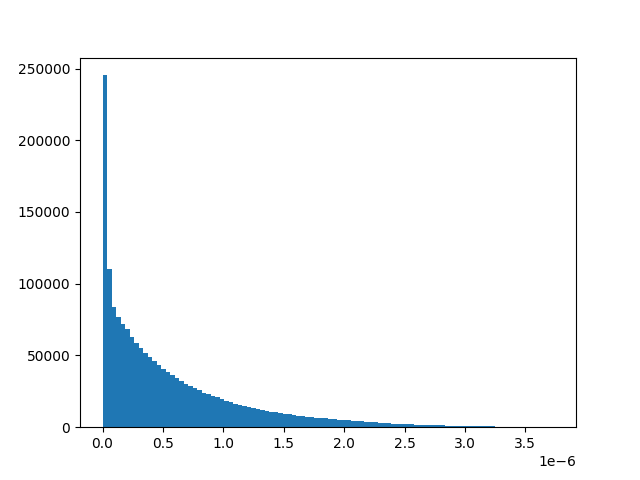

In [14]:
fig, ax = plt.subplots()
ax.hist(A_gold.data, bins=100, range=(0, max(A_gold.data)));

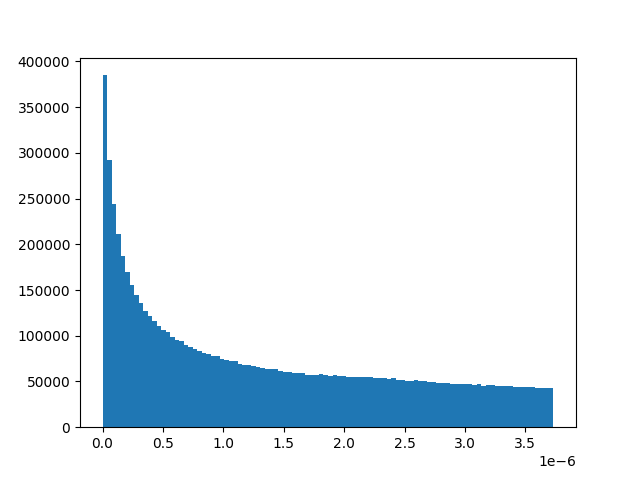

In [15]:
fig, ax = plt.subplots()
ax.hist(val, bins=100, range=(0, max(A_gold.data)));